In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

In [5]:
a = atlas.Atlas( '../cc/tests/data/example_atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


In [8]:
a.save_data()

# Plot

In [9]:
import cProfile

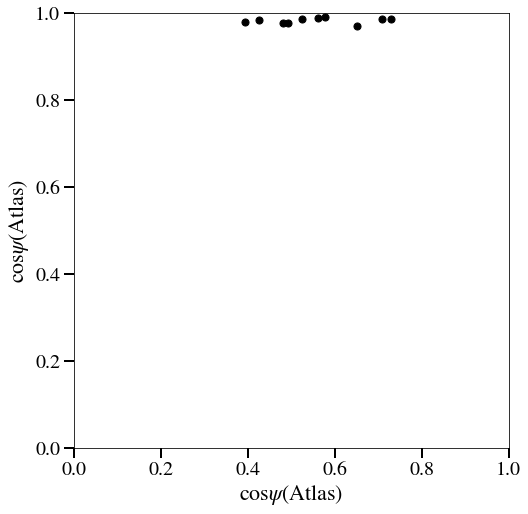

In [10]:
%matplotlib inline

cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
)

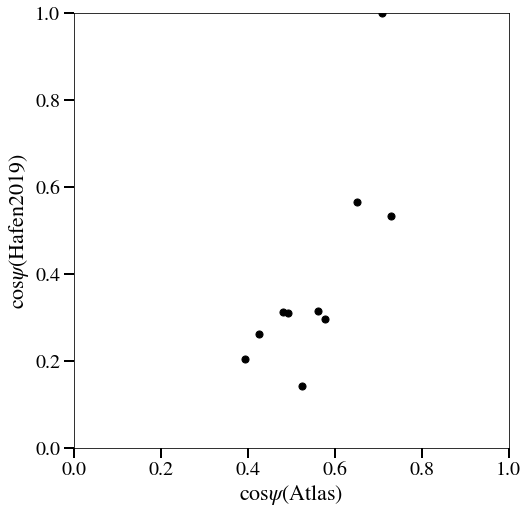

In [11]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a,
    a.data['Hafen2019'],
)

In [13]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a.data['Hafen2019'],
    a.data['Hafen2019'],
    y_kwargs = { 'method': 'abstract similarity'},
)

/Users/zhafen/repos/cc/cc/publication.py:322: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


> /Users/zhafen/repos/cc/cc/publication.py(494)inner_product()
-> return inner_product


(Pdb)  p inner_product


2671


(Pdb)  p sents


array(["['stellar' 'zoom-in' 'contribut' 'deuterium' 'realist' 'abund' 'loss'\n 'environ' 'project' 'quantifi' 'cosmolog' 'simul' 'fraction' 'gas-phas'\n 'feedback' 'mass' 'gas']",
       "['metal' 'deuterium' 'primordi' 'valu' 'abund' 'is' 'confirm' 'low'\n 'simul' 'veri' 'close']",
       "['model' 'deuterium' 'here' 'chemic' 'abund' 'agre' 'evolut' 'deriv'\n 'analyt' 'quantit']",
       "['exhibit' 'deuterium' 'furthermor' 'littl' 'abund' 'oxygen' 'scatter'\n 'find' 'veri' 'relat']",
       "['metal' '<' 'observ' '±' 'higher' 'use' '-5' 'stress' 'constrain' '/sup'\n 'primordi' 'order' 'compar' '×' 'fraction' 'high-redshift' 'simul'\n 'exist' 'be' 'futur' 'determin' 'also' 'deuterium' 'valu' 'sup' '>']",
       "['metal' 'deuterium' 'star' 'redshift' 'mass-loss' 'due'\n 'intermediate-mass' 'increas' 'fix' 'import' 'fraction' 'decreas'\n 'slight']",
       "['deuterium' 'star' 'format' 'correl' 'galaxi' 'evolut' 'find' 'fraction'\n 'histori' 'averag']",
       "['way' 'circl' 'deuteri

(Pdb)  p sents_other


array(["['stellar' 'zoom-in' 'contribut' 'deuterium' 'realist' 'abund' 'loss'\n 'environ' 'project' 'quantifi' 'cosmolog' 'simul' 'fraction' 'gas-phas'\n 'feedback' 'mass' 'gas']",
       "['metal' 'deuterium' 'primordi' 'valu' 'abund' 'is' 'confirm' 'low'\n 'simul' 'veri' 'close']",
       "['model' 'deuterium' 'here' 'chemic' 'abund' 'agre' 'evolut' 'deriv'\n 'analyt' 'quantit']",
       "['exhibit' 'deuterium' 'furthermor' 'littl' 'abund' 'oxygen' 'scatter'\n 'find' 'veri' 'relat']",
       "['metal' '<' 'observ' '±' 'higher' 'use' '-5' 'stress' 'constrain' '/sup'\n 'primordi' 'order' 'compar' '×' 'fraction' 'high-redshift' 'simul'\n 'exist' 'be' 'futur' 'determin' 'also' 'deuterium' 'valu' 'sup' '>']",
       "['metal' 'deuterium' 'star' 'redshift' 'mass-loss' 'due'\n 'intermediate-mass' 'increas' 'fix' 'import' 'fraction' 'decreas'\n 'slight']",
       "['deuterium' 'star' 'format' 'correl' 'galaxi' 'evolut' 'find' 'fraction'\n 'histori' 'averag']",
       "['way' 'circl' 'deuteri

(Pdb)  c


> /Users/zhafen/repos/cc/cc/publication.py(494)inner_product()
-> return inner_product


(Pdb)  p inner_product


2562


(Pdb)  p sents


array(["['stellar' 'zoom-in' 'contribut' 'deuterium' 'realist' 'abund' 'loss'\n 'environ' 'project' 'quantifi' 'cosmolog' 'simul' 'fraction' 'gas-phas'\n 'feedback' 'mass' 'gas']",
       "['metal' 'deuterium' 'primordi' 'valu' 'abund' 'is' 'confirm' 'low'\n 'simul' 'veri' 'close']",
       "['model' 'deuterium' 'here' 'chemic' 'abund' 'agre' 'evolut' 'deriv'\n 'analyt' 'quantit']",
       "['exhibit' 'deuterium' 'furthermor' 'littl' 'abund' 'oxygen' 'scatter'\n 'find' 'veri' 'relat']",
       "['metal' '<' 'observ' '±' 'higher' 'use' '-5' 'stress' 'constrain' '/sup'\n 'primordi' 'order' 'compar' '×' 'fraction' 'high-redshift' 'simul'\n 'exist' 'be' 'futur' 'determin' 'also' 'deuterium' 'valu' 'sup' '>']",
       "['metal' 'deuterium' 'star' 'redshift' 'mass-loss' 'due'\n 'intermediate-mass' 'increas' 'fix' 'import' 'fraction' 'decreas'\n 'slight']",
       "['deuterium' 'star' 'format' 'correl' 'galaxi' 'evolut' 'find' 'fraction'\n 'histori' 'averag']",
       "['way' 'circl' 'deuteri

(Pdb)  p sents_other


array(["['track' 'other' 'studi' 'cgm' 'origin' 'separ' 'wind' 'galaxi' 'central'\n 'particl' 'medium' 'analysi' 'igm' 'use' 'circumgalact' 'gas' 'accret'\n 'eject' 'intergalact']",
       "['sampl' 'h' 'm' 'fire-2' '<' '/sub' 'sub' '-10' '∼' 'z' 'mass' '/sup'\n 'consist' 'span' '☉' 'focus' '=' 'simul' 'sup' '>' 'rang' 'halo']",
       "['∼l' '<' 'onli' 'sup' 'halo' 'owe' '>' 'strong' 'baryon' '⋆' 'mass'\n 'stellar' 'cosmic' 'feedback' 'budget' 'retain' '/sup' 'cent']",
       "['metal' 'cent' '≳' 'retent' 'are' 'effici' 'more' 'retain' 'halo'\n 'fraction']",
       "['≳' 'cgm' 'origin' 'redshift' 'is' 'associ' 'infal' 'analys' 'igm'\n 'accret' 'mass' 'halo' 'cent']",
       "['<' 'is' 'central' 'mass' 'gas' '/sup' 'contribut' 'overal' 'most'\n 'compar' 'strip' '⋆' '∼l' 'eject' 'import' 'second' 'satellit' 'sup'\n 'galaxi' '>' 'halo']",
       "['well' 'cgm' 'result' 'billion' 'persist' 'mixed-halo' 'year' 'gas']",
       "['therefor' 'cgm' 'sightlin' 'origin' 'are' 'intersect' 'gas' '

(Pdb)  q


BdbQuit: 

In [17]:
a.data.inner_product( a.data['Hafen2019'], method='abstract similarity' )

Dict, {
'VandeVoort2018a' : 2562,
'Stern2018' : 2011,
'Howk2017' : 1951,
'Garrison-kimmel2017' : 2336,
'Hopkins2017' : 3035,
'Hafen2016' : 1985,
'Muratov2016' : 2973,
'VandeVoort2016' : 2482,
'Hafen2019' : 2627,
'Hafen2019a' : 2429,
}

In [20]:
a.data['VandeVoort2018a'].inner_product( a.data['Hafen2019'], method='abstract similarity' )

> /Users/zhafen/repos/cc/cc/publication.py(482)inner_product()
-> matching_words = utils.match_words(


(Pdb)  c


> /Users/zhafen/repos/cc/cc/utils.py(72)match_words()
-> if ( len( a ) == 0 ) or ( len( b ) == 0 ):


(Pdb)  n


> /Users/zhafen/repos/cc/cc/utils.py(76)match_words()
-> if not stemmed:


(Pdb)  n


> /Users/zhafen/repos/cc/cc/utils.py(79)match_words()
-> sa, sb = a, b


(Pdb)  n


> /Users/zhafen/repos/cc/cc/utils.py(82)match_words()
-> if max_edit_distance is None:


(Pdb)  p sa


"['stellar' 'zoom-in' 'contribut' 'deuterium' 'realist' 'abund' 'loss'\n 'environ' 'project' 'quantifi' 'cosmolog' 'simul' 'fraction' 'gas-phas'\n 'feedback' 'mass' 'gas']"


(Pdb)  p sb


"['track' 'other' 'studi' 'cgm' 'origin' 'separ' 'wind' 'galaxi' 'central'\n 'particl' 'medium' 'analysi' 'igm' 'use' 'circumgalact' 'gas' 'accret'\n 'eject' 'intergalact']"


(Pdb)  q


BdbQuit: 

In [26]:
list( a.data['Hafen2019'].abstract['nltk']['primary_stemmed'] )

["['track' 'other' 'studi' 'cgm' 'origin' 'separ' 'wind' 'galaxi' 'central'\n 'particl' 'medium' 'analysi' 'igm' 'use' 'circumgalact' 'gas' 'accret'\n 'eject' 'intergalact']",
 "['sampl' 'h' 'm' 'fire-2' '<' '/sub' 'sub' '-10' '∼' 'z' 'mass' '/sup'\n 'consist' 'span' '☉' 'focus' '=' 'simul' 'sup' '>' 'rang' 'halo']",
 "['∼l' '<' 'onli' 'sup' 'halo' 'owe' '>' 'strong' 'baryon' '⋆' 'mass'\n 'stellar' 'cosmic' 'feedback' 'budget' 'retain' '/sup' 'cent']",
 "['metal' 'cent' '≳' 'retent' 'are' 'effici' 'more' 'retain' 'halo'\n 'fraction']",
 "['≳' 'cgm' 'origin' 'redshift' 'is' 'associ' 'infal' 'analys' 'igm'\n 'accret' 'mass' 'halo' 'cent']",
 "['<' 'is' 'central' 'mass' 'gas' '/sup' 'contribut' 'overal' 'most'\n 'compar' 'strip' '⋆' '∼l' 'eject' 'import' 'second' 'satellit' 'sup'\n 'galaxi' '>' 'halo']",
 "['well' 'cgm' 'result' 'billion' 'persist' 'mixed-halo' 'year' 'gas']",
 "['therefor' 'cgm' 'sightlin' 'origin' 'are' 'intersect' 'gas' 'multipl'\n 'like']",
 "['<' 'plane' 'is' 'lt' 'v